<a href="https://colab.research.google.com/github/KirteshVerma/Cardiovascular_Risk_Prediction/blob/main/kirtesh_Cardio_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = ('/content/drive/MyDrive/Capstone_Project_03/data_cardiovascular_risk.csv')

In [4]:
#reading csv file
df = pd.read_csv(path)

In [5]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [7]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


In [8]:
# checking null values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [9]:
#checking duplicated values
duplicated_values = len(df[df.duplicated()])
f'The number of duplicated values are = {duplicated_values}'

'The number of duplicated values are = 0'

In [10]:
df.drop(['id'],axis = 1, inplace = True) #dropping the id column as it want be needed in the model prediction

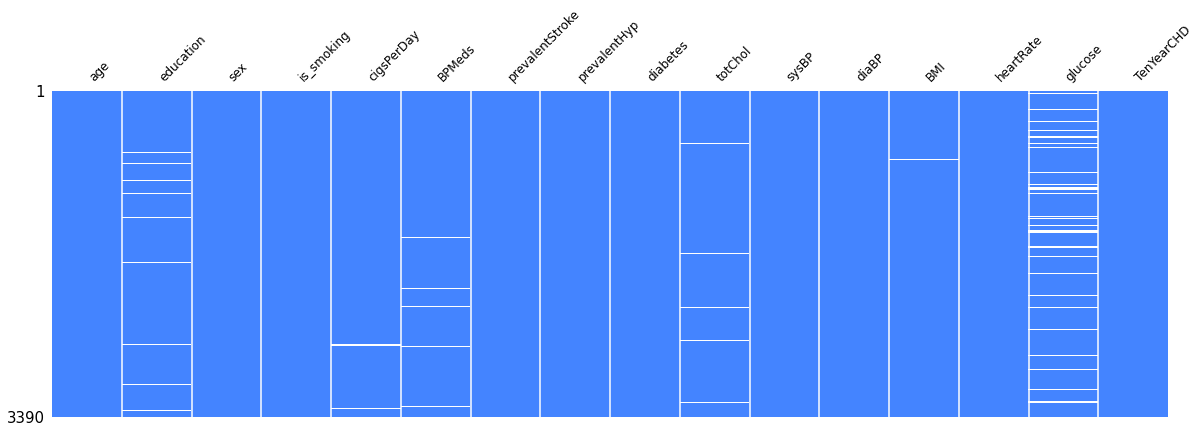

In [11]:
# visualizing null values
import missingno as mn
mn.matrix(df, sparkline=False, figsize=(20,6), fontsize=12, color=(0.27, 0.52, 1.0))


In [12]:
# filling the null values with median and mode for numeric and categorical columns respectively
df['glucose'] = df['glucose'].fillna(df['glucose'].median())
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['BPMeds'].fillna(df['BPMeds'].mode()[0],inplace = True)
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

## Label Encoding

In [13]:
# One Hot Encoding 

df['sex']= df['sex'].apply(lambda x: 1 if x=='M' else 0)
df['is_smoking']= df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [14]:
# creating a list that contains all the numerical features
numerical_columns  = [i for i in df.columns if len(df[i].unique())>25]
print(list(numerical_columns))

['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [15]:
# creating a list that contains all the categorical features
categorical_columns = [i for i in df.columns if len(df[i].unique())<10]

categorical_columns.remove('TenYearCHD') # dropping the target variable i.e. TenYearCHD
print(list(categorical_columns))

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


## Overview of Outliers

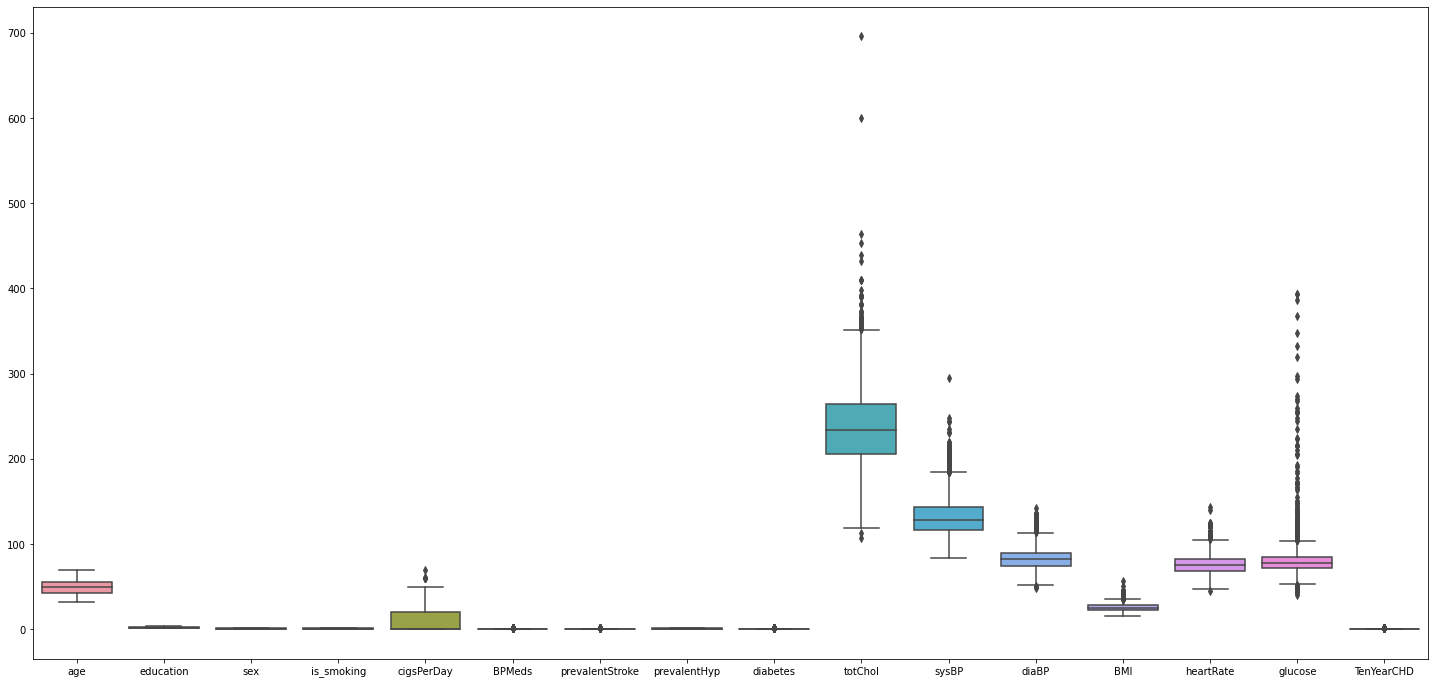

In [16]:
# checking the outliers
plt.figure(figsize= (25,12))
sns.boxplot(data = df)

Outliers can be seen in both the categorical and numerical columns

outliers are present in totChol, cigsPerDay, diaBP,sysBP,hearRate,glucose.

Glucose feature has highest number of outliers.

We cannot just remove the oultiers as it will lead to loss of information.

In [17]:
# looking at the unique values of each column in categorical columns
for feature in categorical_columns:
    print(feature,':')
    print(df[feature].value_counts())
    print("----------------")


education :
1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64
----------------
sex :
0    1923
1    1467
Name: sex, dtype: int64
----------------
is_smoking :
0    1703
1    1687
Name: is_smoking, dtype: int64
----------------
BPMeds :
0.0    3290
1.0     100
Name: BPMeds, dtype: int64
----------------
prevalentStroke :
0    3368
1      22
Name: prevalentStroke, dtype: int64
----------------
prevalentHyp :
0    2321
1    1069
Name: prevalentHyp, dtype: int64
----------------
diabetes :
0    3303
1      87
Name: diabetes, dtype: int64
----------------


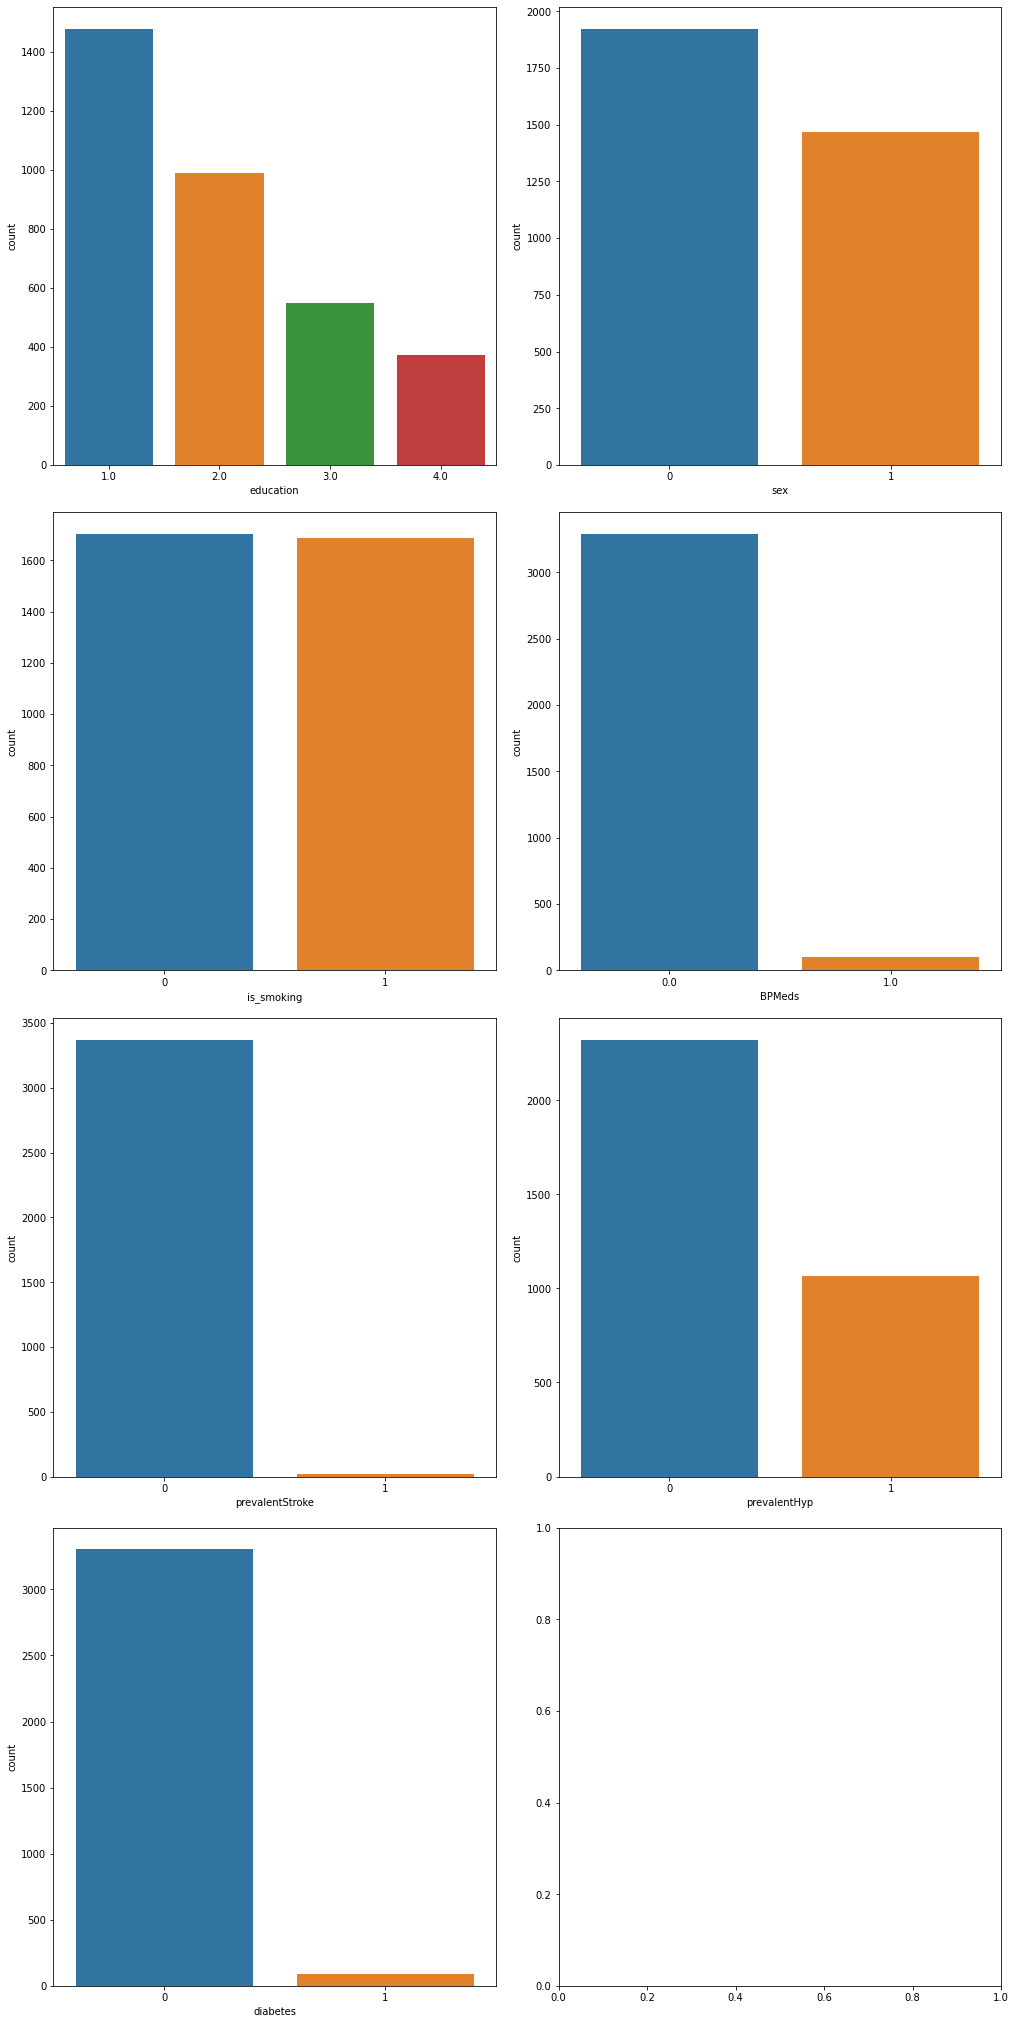

In [18]:
#plotting countplot for categorical columns
num_plots = len(categorical_columns)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_columns):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=df, ax=axs[row][pos])

Number of people who were not on BPmeds, who did not had a stroke in past, and who are dont have diastolic blood pressure are very less.

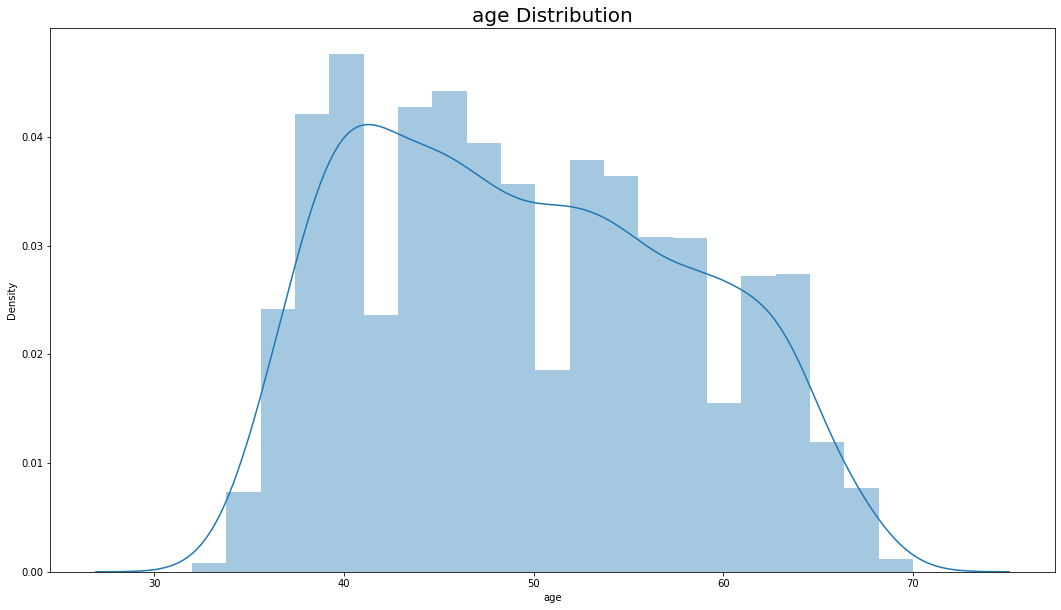

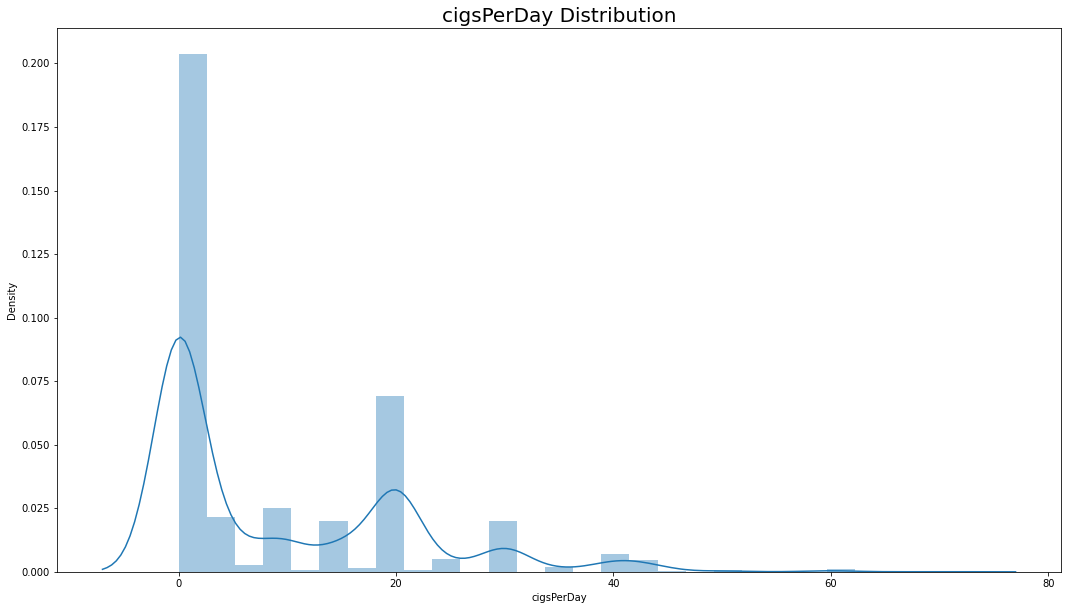

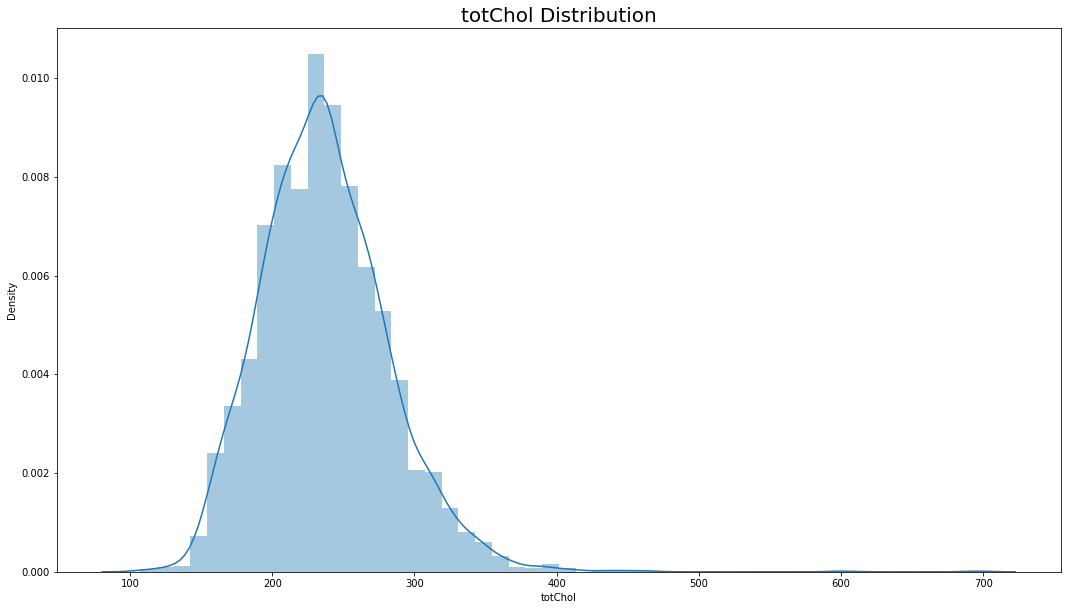

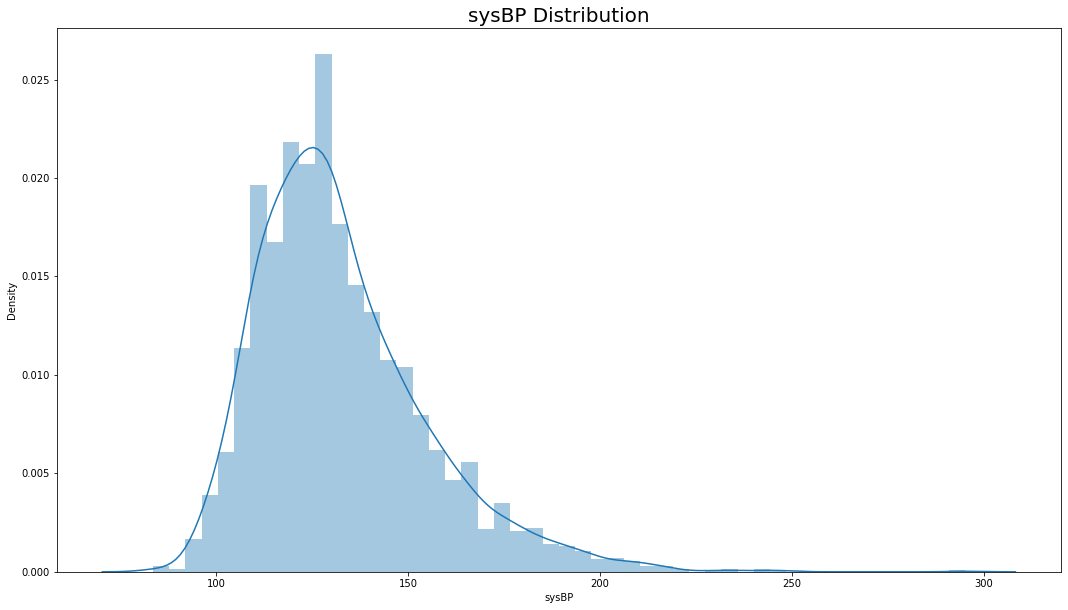

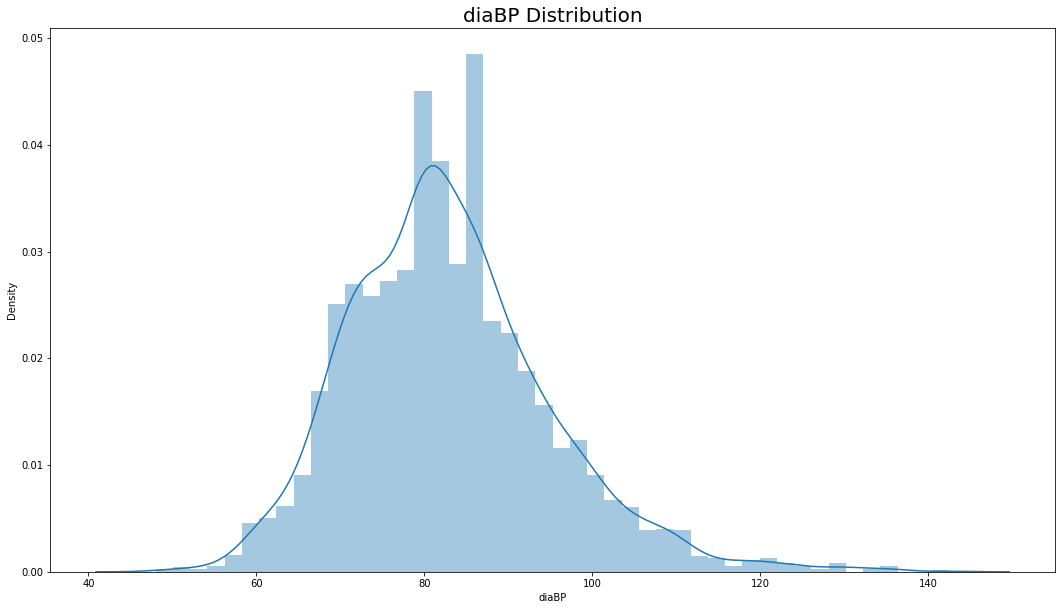

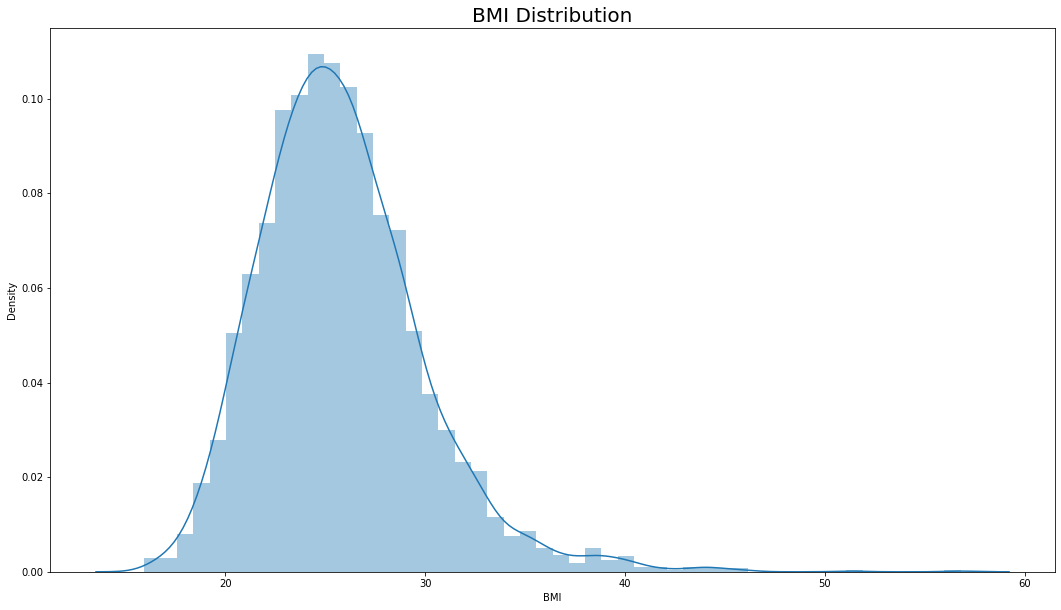

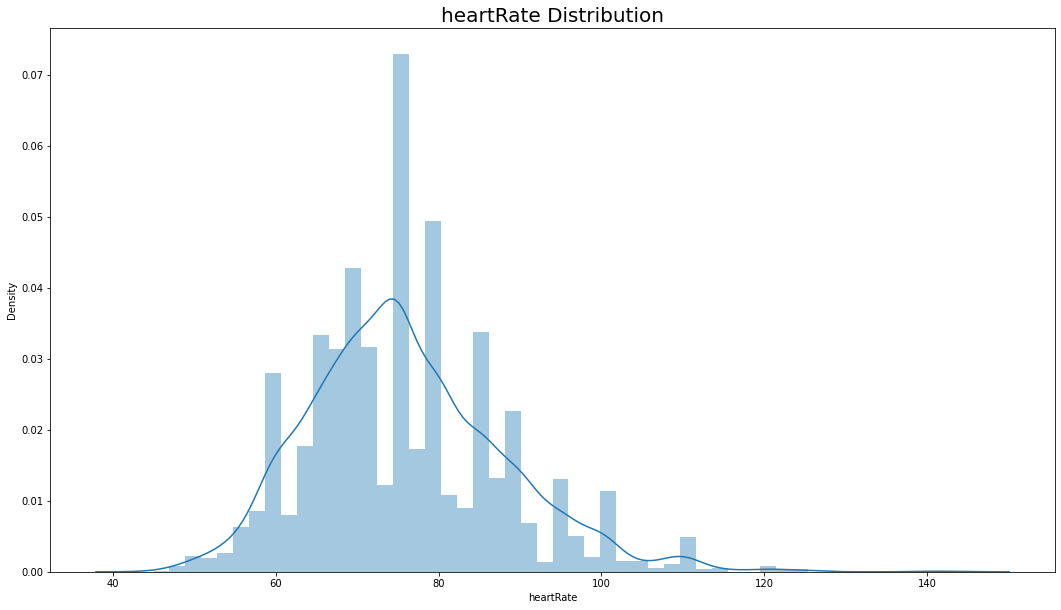

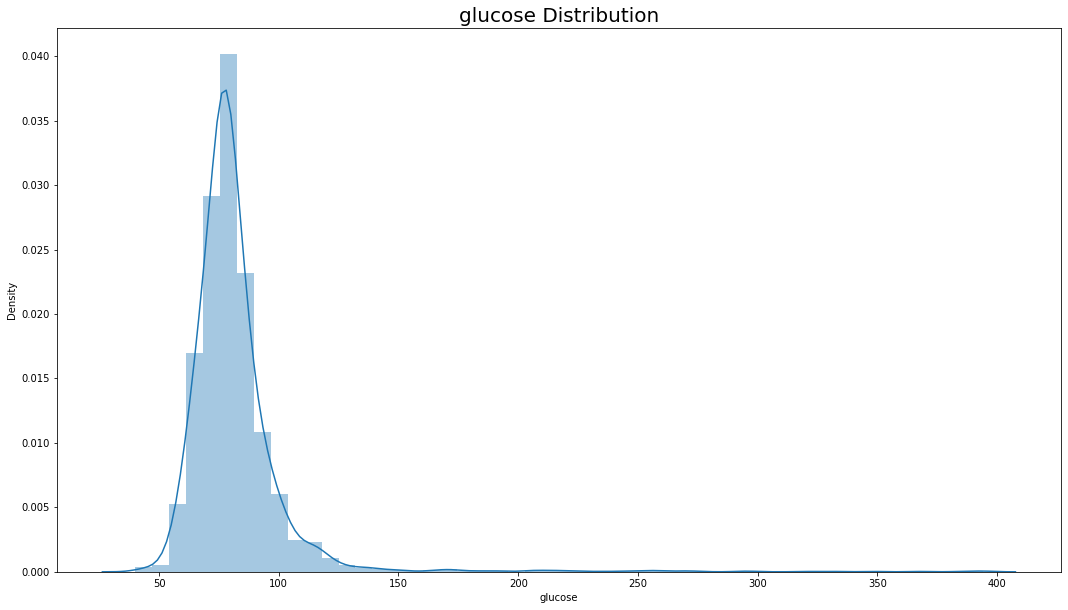

In [19]:

for feature in numerical_columns:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(df[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

Glucose and totalChol are higly right skewed.

BMI, diaBP and sysBP are some what normally distributed.



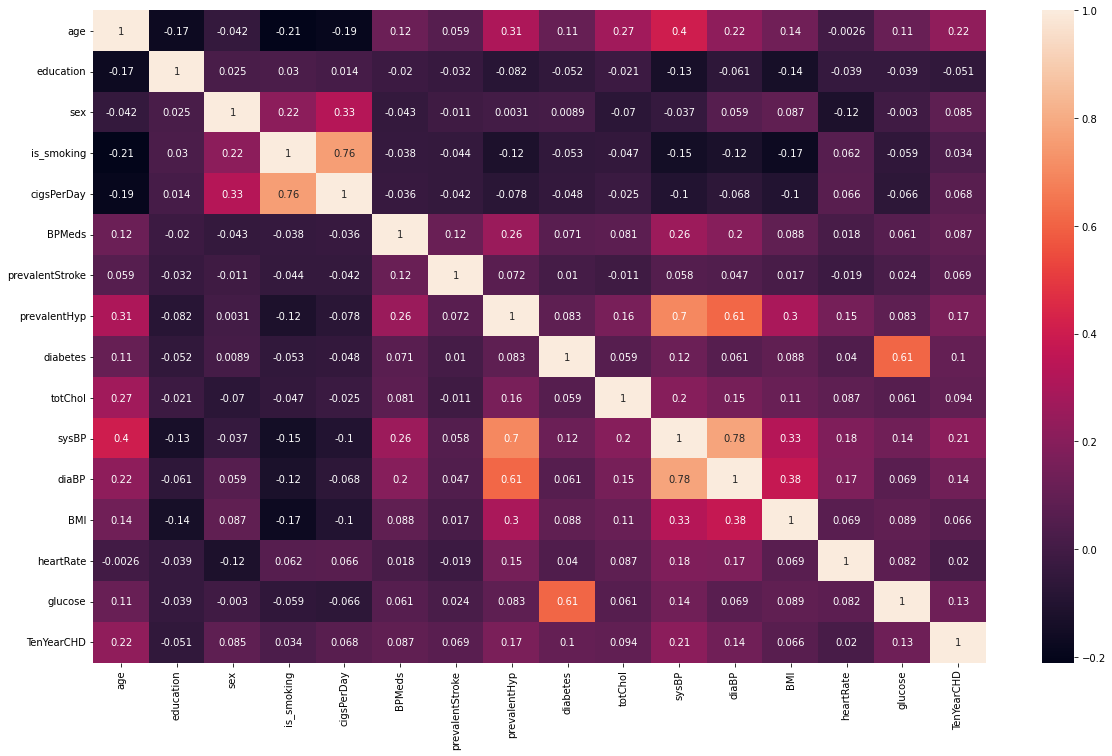

In [20]:
# lookings at the relationship of features with one another
plt.figure(figsize=(20,12))
sns.heatmap(data = df.corr(),annot= True)

sysBP and diaBP show the strongest positive correlation of 0.78 with each other.

is_smoking and cigsPerDay has positive correlation of 0.76.

Correlation of diabetes with glucose and prevalentHype with diaBP is equal i.e. positive correlation of 0.61.

Let us derive a new feature i.e. avgBP which would be defined by the below formula

avgBP = (sysBP + diaBP)/2

In [21]:
df["avgBP"]= round((df["sysBP"]+df["diaBP"])/2,2)

In [22]:
# Since avgBP has been added, we can now remove sysBP & diaBP
df.drop("sysBP",axis=1,inplace=True)
df.drop("diaBP",axis=1,inplace=True)

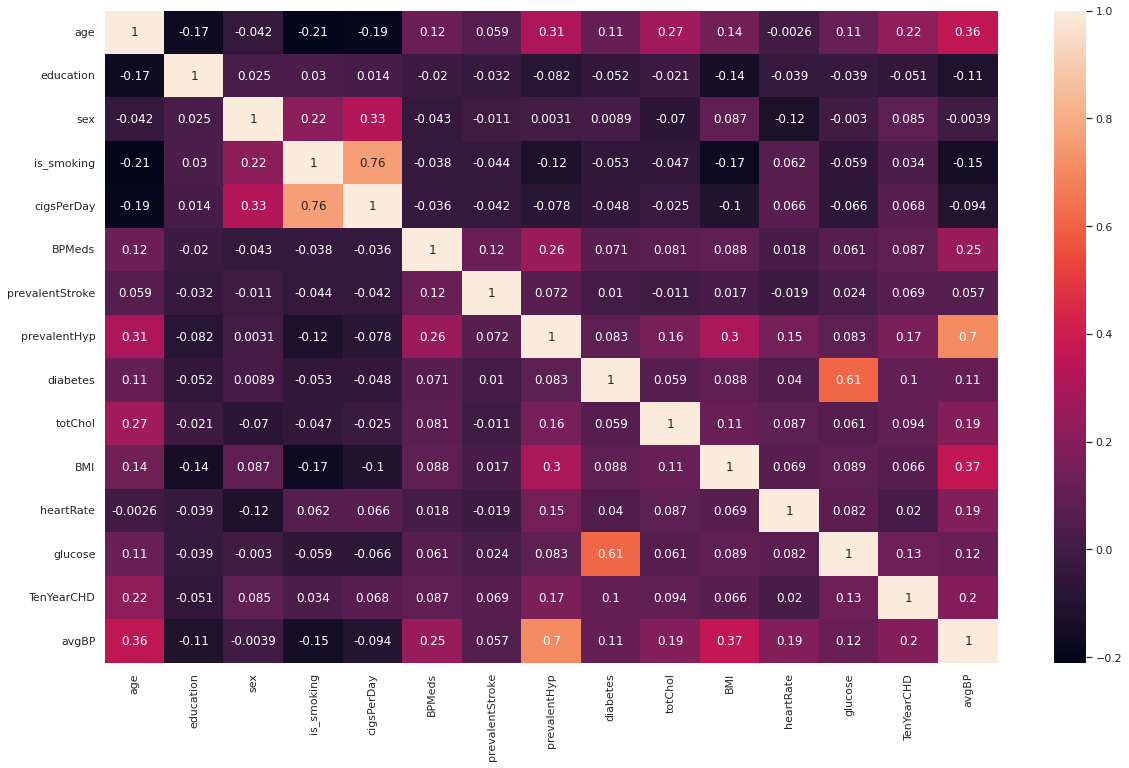

In [23]:
plt.figure(figsize=(20,12))
sns.set(font_scale = 1)
sns.heatmap(data = df.corr(),annot= True)

## EDA

In [24]:
#lets look at the target variable
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

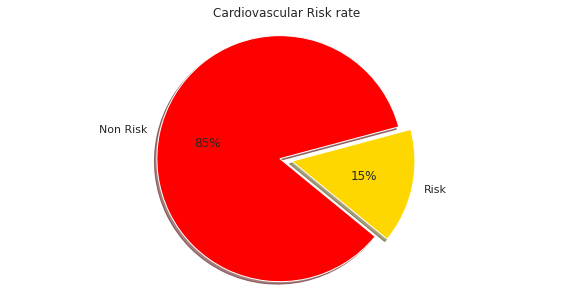

In [25]:
labels = 'Non Risk',"Risk"
my_colors = ['red','gold']
my_explode = (0,0.1)
plt.figure(figsize=(10,5))
plt.pie(df['TenYearCHD'].value_counts(), labels=labels ,autopct='%1.0f%%', startangle =15, shadow =True, colors = my_colors, explode=my_explode )
plt.title("Cardiovascular Risk rate")
plt.axis('equal')
plt.show()

85% of people have no risk where as 
15% of people has risk.

<Figure size 720x432 with 0 Axes>

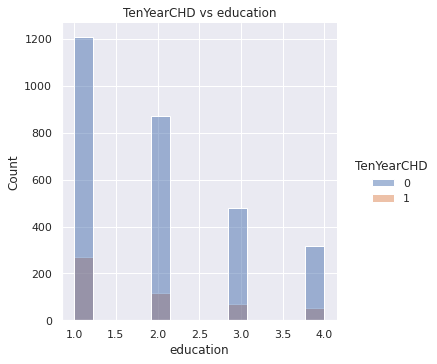

<Figure size 720x432 with 0 Axes>

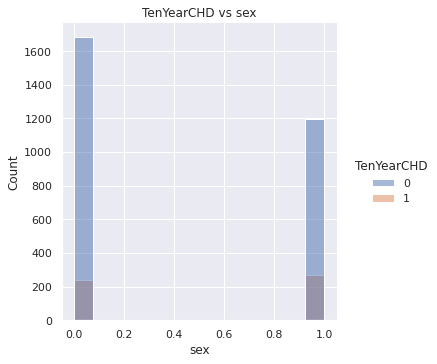

<Figure size 720x432 with 0 Axes>

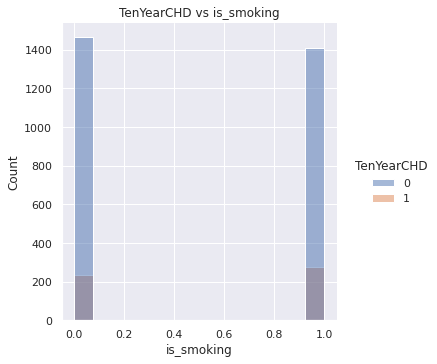

<Figure size 720x432 with 0 Axes>

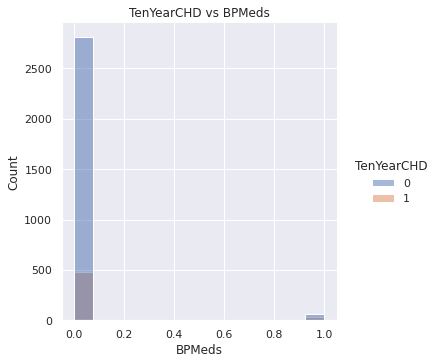

<Figure size 720x432 with 0 Axes>

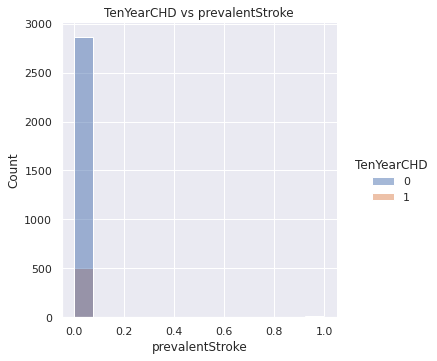

<Figure size 720x432 with 0 Axes>

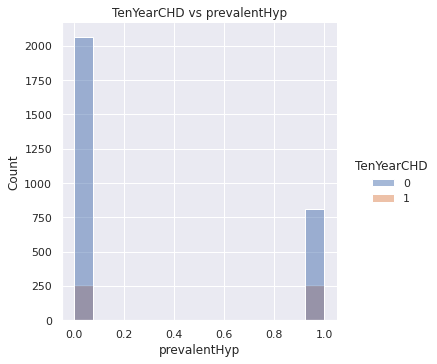

<Figure size 720x432 with 0 Axes>

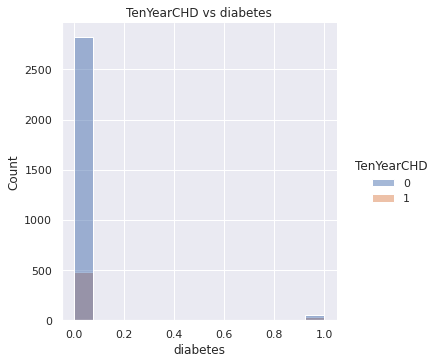

In [26]:
for a, b in enumerate(categorical_columns):
  plt.figure(figsize = (10,6))
  sns.displot(df, x=b, hue="TenYearCHD")
  plt.title(f'TenYearCHD vs {b}')
  plt.show()

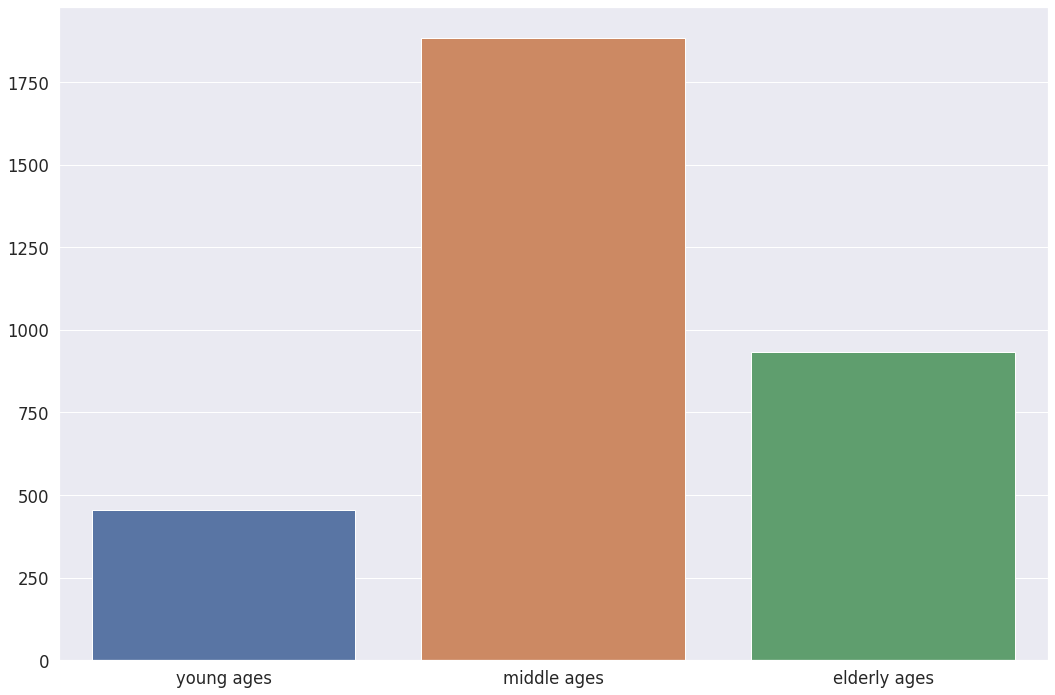

In [27]:
#dividing the age into three section
Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Elder = df[(df.age>55)]

plt.figure(figsize=(15,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

Count of Middle age person are highest followed by elderly person.


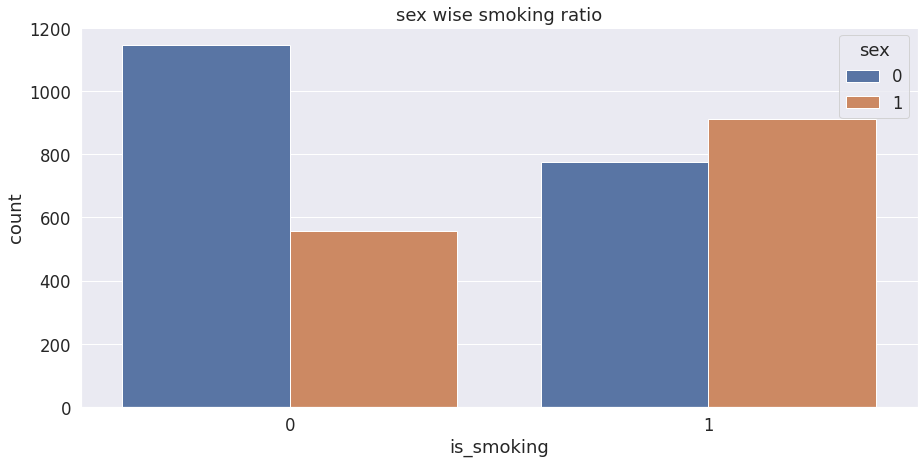

In [28]:
# number of male and female smokers
plt.figure(figsize=(15,7))
sns.countplot(x='is_smoking', hue = 'sex', data=df)
plt.title('sex wise smoking ratio')

plt.show()

Number of male smoker is higher than female smoker.

Number of non-smoker male is higher than female.This could be due to the fact that total count of male is higher than female in the given dataset.



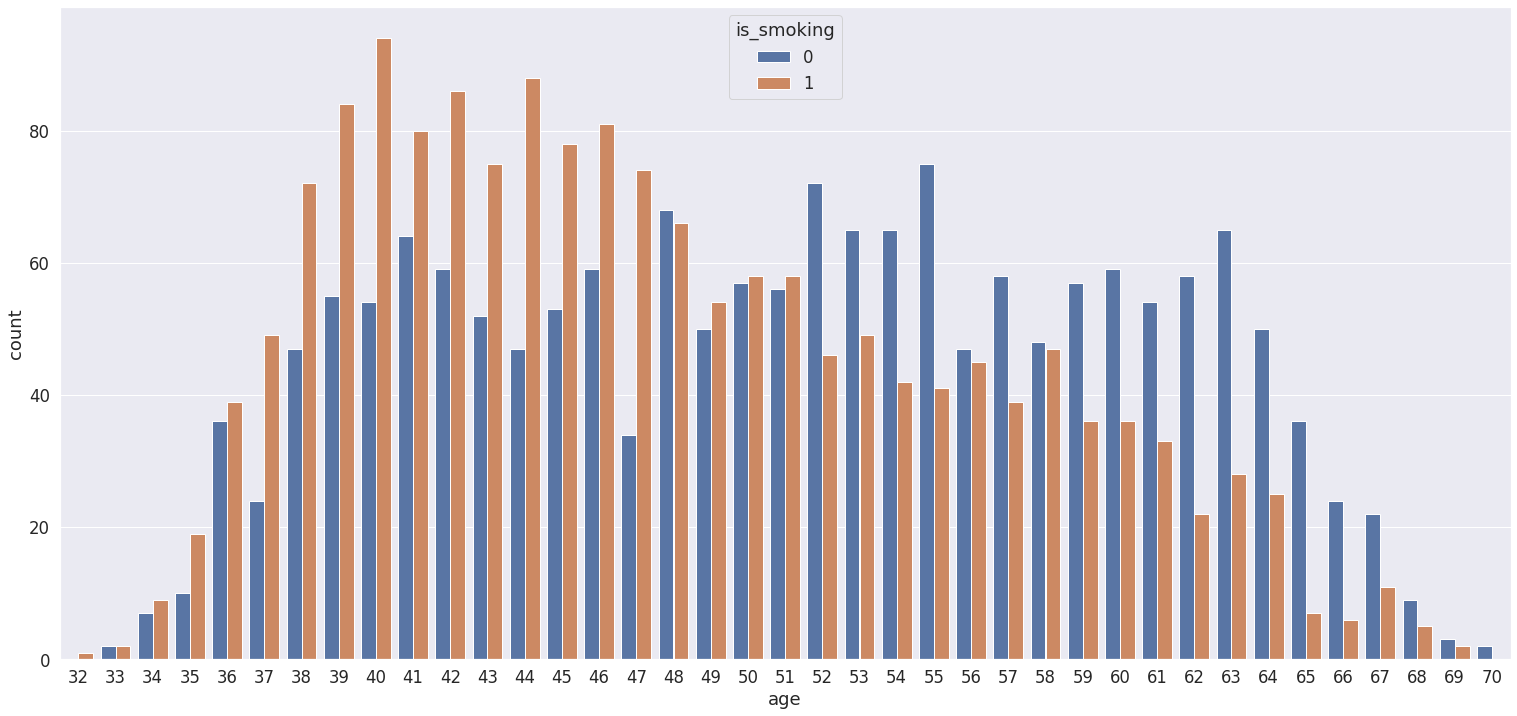

In [29]:
#age wise smoking ratio
plt.figure(figsize=(26,12), facecolor='w')
sns.countplot(x="age",data=df,hue="is_smoking")

Number of smokers between the age group of 35 to 50 are highest i.e. Young and middle aged people smokes most.

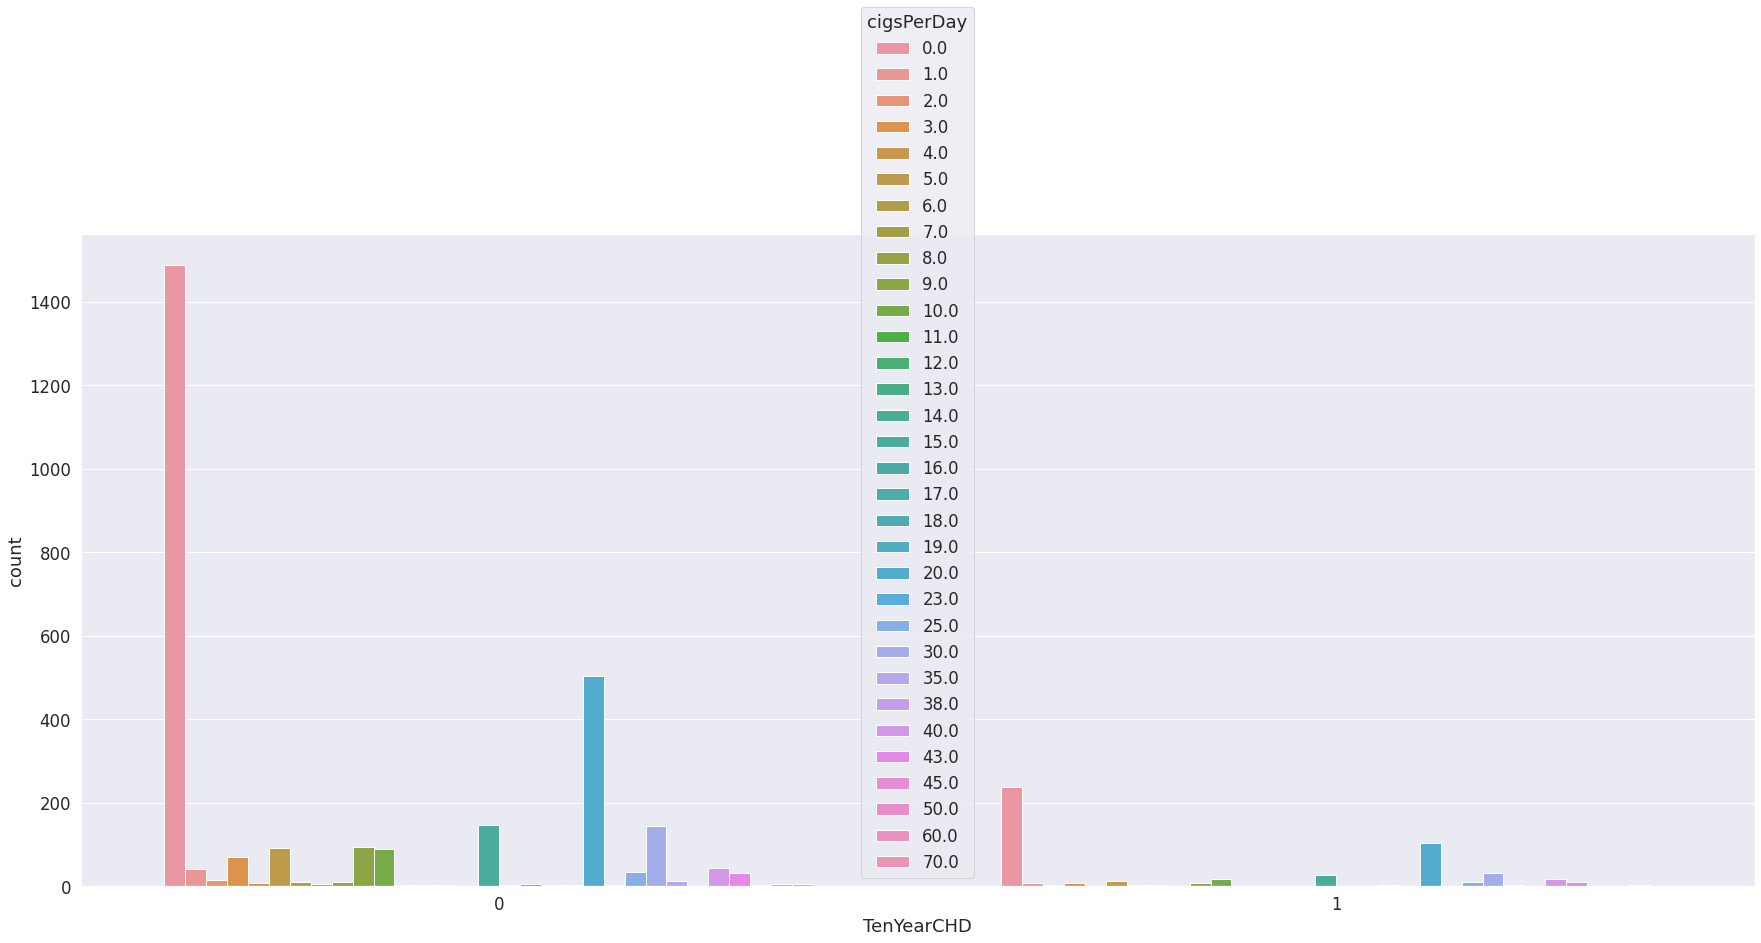

In [30]:
# checking the relationship between cigerperday and cardiovascular heart disease
plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x="TenYearCHD",data=df,hue="cigsPerDay")

Number of peope who don't smoke is higher than the people who smoke.

In general people who don't smoke are less likely to suffer from heart disease than those who smokes.

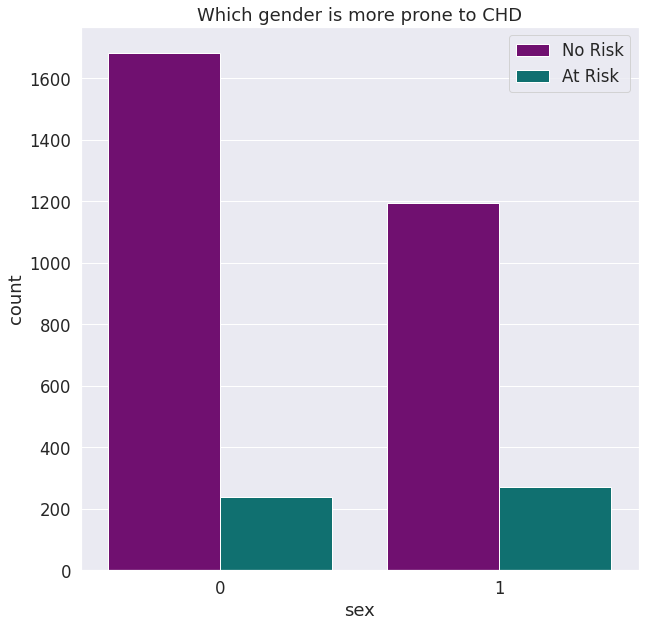

In [31]:
my_palette = {0 : 'purple' , 1 : 'teal'}

plt.figure(figsize = (10,10))
sns.countplot(x = df['sex'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which gender is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

As number of male is higher than female it's obvious that male are more at risk from heart disease than female.

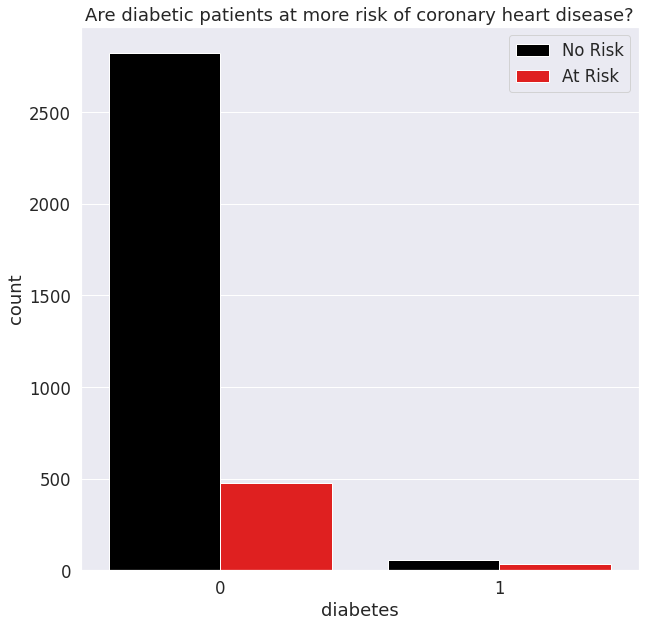

In [32]:
# diabetes and heart disease relation
my_palette = {0 : 'black' , 1 : 'red'}
plt.figure(figsize = (10,10))
sns.countplot(x = df['diabetes'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are diabetic patients at more risk of coronary heart disease?")
plt.legend(['No Risk','At Risk'])
plt.show()

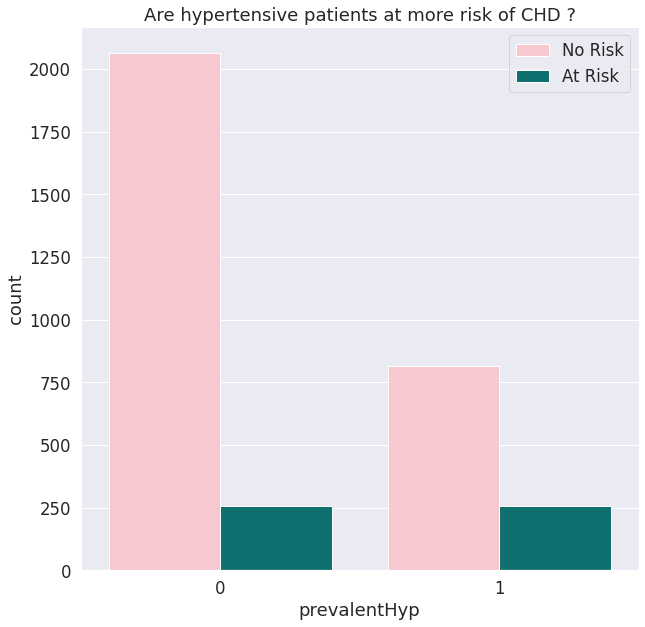

In [33]:
#relation between hypertensive patient and heart disease
plt.figure(figsize = (10,10))
my_palette = {0 : 'pink' , 1 : 'teal'}
sns.countplot(x = df['prevalentHyp'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are hypertensive patients at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

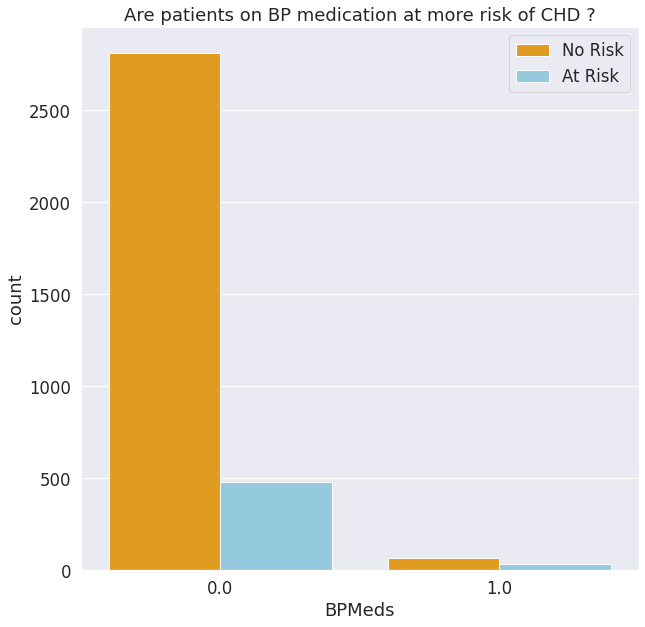

In [34]:
# relation between BP medication and heart disease
my_palette = {0 : 'orange' , 1 : 'skyblue'}
plt.figure(figsize = (10,10))
sns.countplot(x = df['BPMeds'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are patients on BP medication at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

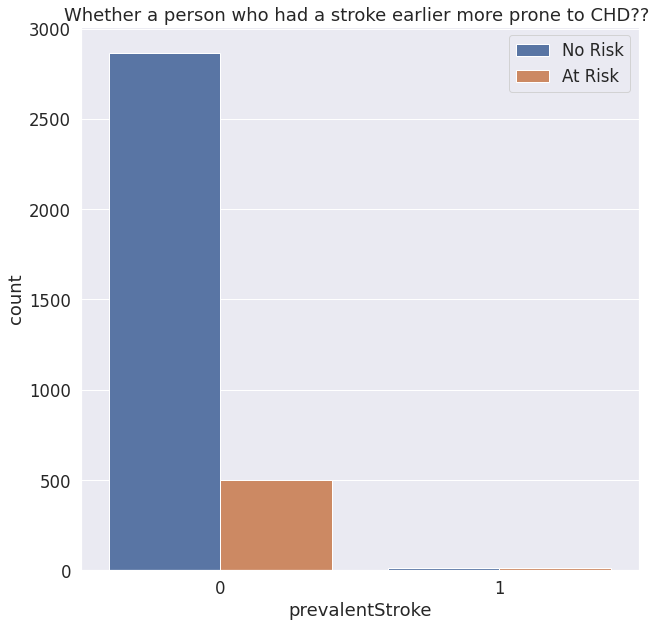

In [35]:
#relation between people who had stroke and heart disease
plt.figure(figsize = (10,10))
# my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df['prevalentStroke'], hue = df['TenYearCHD'])
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
plt.legend(['No Risk' , 'At Risk'])
plt.show()

## Checking and Balancing the class imbalanced

In [36]:
new_df = df.copy()

In [37]:
# Let us now split
X = new_df.drop(['TenYearCHD'], axis=1)
y = new_df['TenYearCHD']

In [38]:
#Using SMOTE for oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape :', len(new_df))
print('Resampled dataset shape :', len(y_smote))

Original dataset shape : 3390
Resampled dataset shape : 5758


In [39]:
X_resampled= pd.DataFrame(x_smote)
y_resampled= pd.DataFrame(y_smote)

In [40]:
y_resampled.value_counts()

TenYearCHD
0             2879
1             2879
dtype: int64

## Standardizing the Dataset

In [41]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X_resampled)

In [42]:
X = pd.DataFrame(X,columns= (new_df.drop(['TenYearCHD'], axis=1).columns))

## Data Modeling

In [43]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split


In [44]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_resampled , test_size=0.3,stratify = y_resampled, random_state=0)

In [45]:
# create and train logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(fit_intercept=True, max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [46]:
logistic_regression_model.coef_

array([[ 0.58954182,  0.0019962 , -0.29253238, -0.39759938,  0.7607054 ,
         0.13920411, -0.03500004, -0.35718158, -0.15459648,  0.06525018,
        -0.00830736, -0.08285449,  0.30709263,  0.56372703]])

In [47]:
# Get the predicted probabilities
train_preds = logistic_regression_model.predict(X_train)
test_preds = logistic_regression_model.predict(X_test)

In [48]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6707196029776675
The accuracy on test data is  0.6712962962962963


[[1350  665]
 [ 662 1353]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

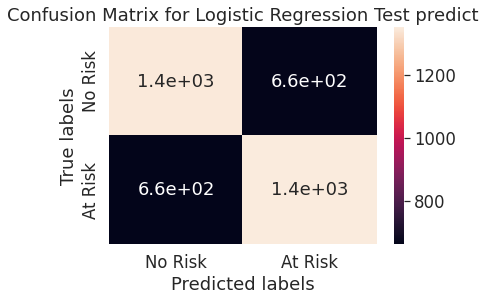

In [49]:
# Get the confusion matrix for train
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[581 283]
 [285 579]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

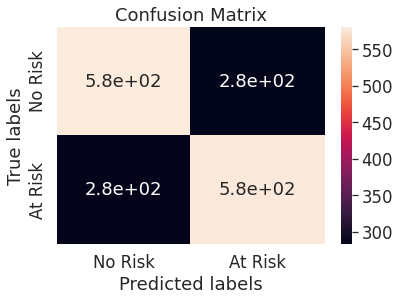

In [50]:
# Get the confusion matrix for test
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [51]:
#Performance Metrics
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predictions= lr.predict(X_test)

lr_accuracy= accuracy_score(lr_predictions,y_test)
lr_precision= precision_score(lr_predictions,y_test)
lr_recall= recall_score(lr_predictions,y_test)
lr_f1_score= f1_score(lr_predictions, y_test)

print('Performance of Logistic Regression Classifier')
print('Accuracy :' , lr_accuracy)
print('Precision :', lr_precision)
print('Recall :', lr_recall)
print('F1 Score :', lr_f1_score)

Performance of Logistic Regression Classifier
Accuracy : 0.6712962962962963
Precision : 0.6701388888888888
Recall : 0.6716937354988399
F1 Score : 0.6709154113557358


<Figure size 1080x576 with 0 Axes>

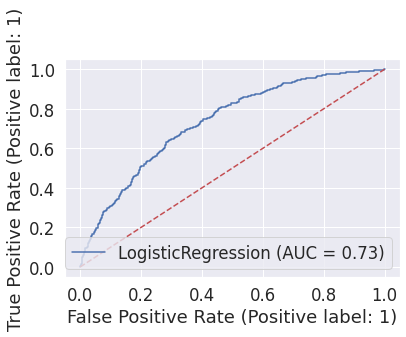

In [52]:
# Let us plot ROC curve
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(lr,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

In [53]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_predictions= knn.predict(X_test)

#Performance Metrics
knn_accuracy= accuracy_score(knn_predictions,y_test)
knn_precision= precision_score(knn_predictions,y_test)
knn_recall= recall_score(knn_predictions,y_test)
knn_f1_score= f1_score(knn_predictions, y_test)

print('Performance of KNN Classifier')
print('Accuracy :' , knn_accuracy)
print('Precision :', knn_precision)
print('Recall :', knn_recall)
print('F1 Score :', knn_f1_score)

Performance of KNN Classifier
Accuracy : 0.7482638888888888
Precision : 0.8472222222222222
Recall : 0.7072463768115942
F1 Score : 0.7709320695102686


In [54]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
grid_search_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',return_train_score = False,verbose=1)
  

grid_search_knn.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [55]:
# The Best Parameters
print('Best Parameters:', grid_search_knn.best_estimator_.get_params())

Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


In [56]:
knn_predictions= grid_search_knn.predict(X_test)

#Performance Metrics
knn1_accuracy= accuracy_score(knn_predictions,y_test)
knn1_precision= precision_score(knn_predictions,y_test)
knn1_recall= recall_score(knn_predictions,y_test)
knn1_f1_score= f1_score(knn_predictions, y_test)

print('Performance of KNN with Hyperparameter Tuning')
print('Accuracy :' , knn1_accuracy)
print('Precision :', knn1_precision)
print('Recall :', knn1_recall)
print('F1 Score :', knn1_f1_score)

Performance of KNN with Hyperparameter Tuning
Accuracy : 0.8234953703703703
Precision : 0.9085648148148148
Recall : 0.7764589515331355
F1 Score : 0.8373333333333334


<Figure size 1080x576 with 0 Axes>

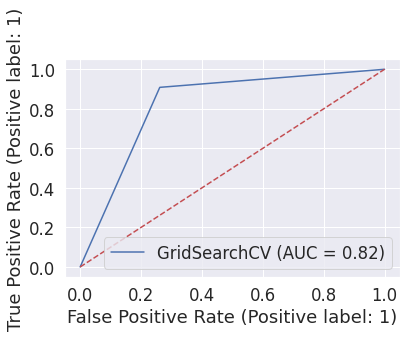

In [57]:
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(grid_search_knn,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

## Decision Tree

In [58]:
#importing library for decision tree classifier
from sklearn.tree import DecisionTreeClassifier



DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50, random_state=0)

In [59]:
decision_tree_model = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes= 50,random_state=0)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50, random_state=0)

In [60]:
train_preds = decision_tree_model.predict(X_train)
test_preds = decision_tree_model.predict(X_test)

In [61]:
#checking Accuracy and AUC-ROC score
testing_accuracy = accuracy_score(y_test, test_preds) 
print(f'the testing accuracy is {testing_accuracy}')
training_accuracy = accuracy_score(y_train,train_preds) 
print(f'the training accuracy is {training_accuracy}')

the testing accuracy is 0.7893518518518519
the training accuracy is 0.8220843672456576


[[1938   77]
 [ 640 1375]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

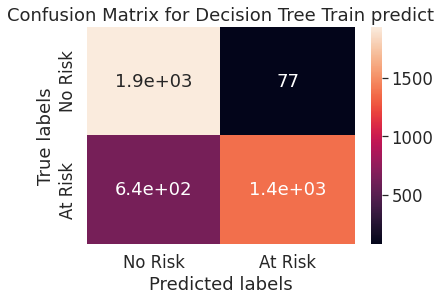

In [63]:
#confusion Matrix(train_data)
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[799  65]
 [299 565]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

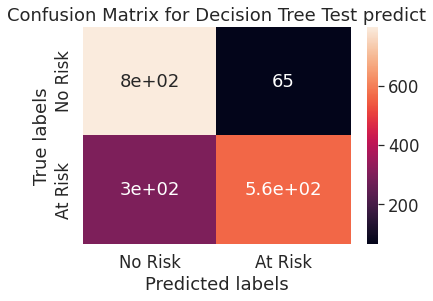

In [64]:
#confusion matrix(test_data)
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [65]:
decision_tree_model= DecisionTreeClassifier()
decision_tree_model.fit(X_train,y_train)
decision_tree_model = decision_tree_model.predict(X_test)

#Performance Metrics
dt_accuracy= accuracy_score(y_test,test_preds)
dt_precision= precision_score(y_test,test_preds)
dt_recall= recall_score(y_test,test_preds)
dt_f1_score= f1_score( y_test,test_preds)

print('Performance of Decision tree Classifier')
print('Accuracy :' , dt_accuracy)
print('Precision :', dt_precision)
print('Recall :', dt_recall)
print('F1 Score :', dt_f1_score)

Performance of Decision tree Classifier
Accuracy : 0.7893518518518519
Precision : 0.8968253968253969
Recall : 0.6539351851851852
F1 Score : 0.7563587684069613


## Support Vector Machine

In [66]:
from sklearn.svm import SVC
svm= SVC()
svm.fit(X_train,y_train)
svm_predictions= svm.predict(X_test)

#Performance Metrics
svm_accuracy= accuracy_score(svm_predictions,y_test)
svm_precision= precision_score(svm_predictions,y_test)
svm_recall= recall_score(svm_predictions,y_test)
svm_f1_score= f1_score(svm_predictions, y_test)

print('Performance of Support Vector Machine Classifier')
print('Accuracy :' , svm_accuracy)
print('Precision :', svm_precision)
print('Recall :', svm_recall)
print('F1 Score :', svm_f1_score)

Performance of Support Vector Machine Classifier
Accuracy : 0.7222222222222222
Precision : 0.7627314814814815
Recall : 0.7055674518201285
F1 Score : 0.7330367074527253


<Figure size 1080x576 with 0 Axes>

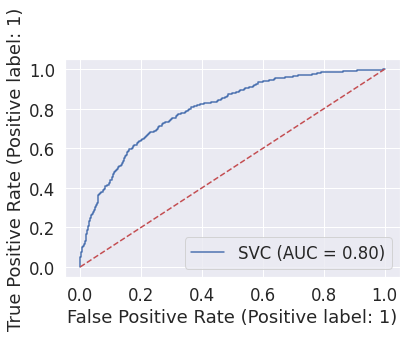

In [67]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(svm,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

In [ ]:
#Hyper parameter tuning 

In [68]:
kernel = ['rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=10, cv=cv, scoring='f1',error_score=0,verbose=3)
grid_result = grid_search_svm.fit(X_train, y_train)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


In [69]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.784346 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
svm_predictions= grid_search_svm.predict(X_test)

# #Performance Metrics
svm1_accuracy= accuracy_score(svm_predictions,y_test)
svm1_precision= precision_score(svm_predictions,y_test)
svm1_recall= recall_score(svm_predictions,y_test) 
svm1_f1_score= f1_score(svm_predictions, y_test)

print('Performance of Support Vector Machine Classifier after hyperparameter tuning')
print('Accuracy :' , svm1_accuracy)
print('Precision :', svm1_precision)
print('Recall :', svm1_recall)
print('F1 Score :', svm1_f1_score)

In [ ]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(grid_search_svm,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()